In [1]:
import gzip
import math
import random
import scipy
import scipy.optimize
import numpy
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import linear_model
import json

In [2]:
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield json.loads(l)

In [3]:
def parseData(fname):
    for l in open(fname):
        yield json.loads(l)

In [4]:
dataset = list(parseData("Office_Products_200k.json"))

In [5]:
len(dataset)

200000

In [6]:
vote = []
non_vote = []

In [7]:
for d in dataset:
    if "vote" in d:
        vote.append(d)
    else:
        non_vote.append(d)

In [8]:
vote[0]

{'overall': 5.0,
 'vote': '2',
 'verified': False,
 'reviewTime': '06 22, 2015',
 'reviewerID': 'A2I6MHMAZZDCRX',
 'asin': '0140503528',
 'style': {'Format:': ' Hardcover'},
 'reviewerName': 'Mark Baker - Carstairs Considers',
 'reviewText': "One day, Corduroy, a stuffed bear, goes with Lisa, his owner, and her mother to do laundry at the laundromat.  As Lisas mom reminds her to empty her pockets, Corduroy decides he needs a pocket on his overalls and sets out on a search to find one.  What might he find along the way?  Will he wander completely away from Lisa?\n\nThis is a sweet and fun book that I think I might like better than the original.  The reason for this is the creativity of what Corduroy runs across in the laundromat and what he thinks it might be.  We, of course, know better, but his guesses make perfect sense from his experiences.  The pictures are wonderful and expertly capture the story.\n\nIf you are a fan of this stuffed bears first adventure, don't hesitate to get thi

In [9]:
len(vote)

121441

In [10]:
len(non_vote)

78559

In [16]:
###############################################

In [11]:
cnt1 = 0
cnt2 = 0
cnt3 = 0
cnt4 = 0
cnt5 = 0
rating_sum = 0

for d in dataset:
    r = d["overall"]
    rating_sum += r
    if r == 1.0:
        cnt1 += 1
    elif r == 2.0:
        cnt2 += 1
    elif r == 3.0:
        cnt3 += 1
    elif r == 4.0:
        cnt4 += 1
    elif r == 5.0:
        cnt5 += 1
    else:
        print("invalid rating")

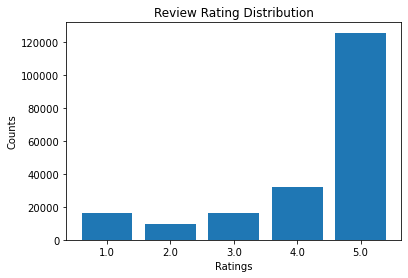

In [12]:
label_list = ['1.0', '2.0', '3.0', '4.0', '5.0']
num_list = [cnt1, cnt2, cnt3, cnt4, cnt5]
plt.bar(label_list, num_list)
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.title("Review Rating Distribution")
plt.show()

In [13]:
rating_sum/len(dataset)

4.207515

In [14]:
productCount = defaultdict(int)
userSet = set()
productSet = set()
userPerProduct = defaultdict(set)
productPerUser = defaultdict(set)
ratingDict = {}

In [15]:
for d in dataset:
    user,product = d['reviewerID'], d['asin']
    productCount[product] += 1
    userSet.add(user)
    productSet.add(product)
    userPerProduct[product].add(user)
    productPerUser[user].add(product)
    ratingDict[(user,product)] = d['overall']

In [16]:
len(productCount)

45697

In [17]:
len(userSet)

92231

In [18]:
len(productSet)

45697

In [19]:
userAverages = {}
productAverages = {}

for u in productPerUser:
    rs = [ratingDict[(u,i)] for i in productPerUser[u]]
    if len(rs) == 0:
        userAverages[u] = 0
        continue
    userAverages[u] = sum(rs) / len(rs)
    
for i in userPerProduct:
    rs = [ratingDict[(u,i)] for u in userPerProduct[i]]
    if len(rs) == 0:
        productAverages[i] = 0
        continue
    productAverages[i] = sum(rs) / len(rs)

In [78]:
len(userAverages)

92231

In [79]:
type(userAverages)

dict

In [80]:
x = list(range(1, len(userAverages) + 1))

In [81]:
y = sorted(userAverages.values())

In [82]:
cnt = 0
for i in y:
    if i >= 5.0:
        cnt += 1

In [83]:
print(cnt)

47995


In [84]:
len(y)

92231

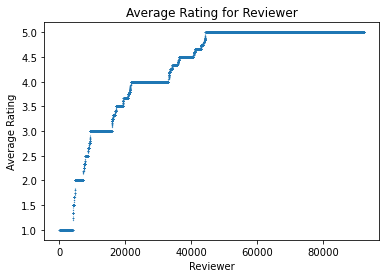

In [24]:
plt.scatter(x, y, marker = '.', s = 0.1)
plt.xlabel('Reviewer')
plt.ylabel('Average Rating')
plt.title('Average Rating for Reviewer')
plt.show()

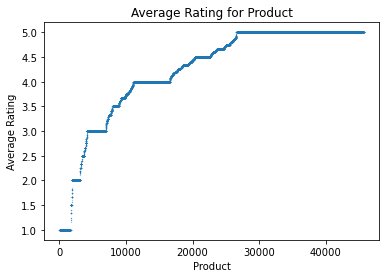

In [85]:
x = list(range(1, len(productAverages) + 1))
y = sorted(productAverages.values())
plt.scatter(x, y, marker = '.', s = 0.1)
plt.xlabel('Product')
plt.ylabel('Average Rating')
plt.title('Average Rating for Product')
plt.show()

In [86]:
cnt = 0
for i in y:
    if i >= 5.0:
        cnt += 1

In [87]:
print(cnt)

19129


In [88]:
len(y)

45697

In [50]:
votecount1 = defaultdict(int)

In [51]:
for d in vote:
    v = d['vote']
    v = int(v.replace(",",""))
    votecount1[v] += 1

In [53]:
f = zip(votecount1.keys(), votecount1.values())
c = sorted(f)

In [74]:
max(votecount1.values())

42283

In [64]:
vote_label = []
review_cnt = []
for x in c:
      if x[0] <= 60:
        vote_label.append(x[0])
        review_cnt.append(x[1])

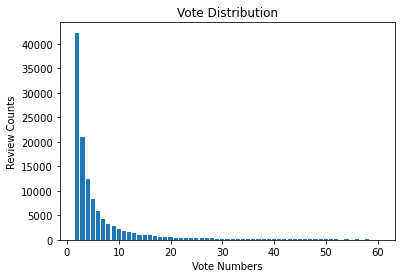

In [65]:
plt.bar(vote_label, review_cnt)
plt.xlabel("Vote Numbers")
plt.ylabel("Review Counts")
plt.title("Vote Distribution")
plt.show()

In [66]:
max(vote_label)

60

In [70]:
vote_label1 = []
text_length = []
for d in vote:
    if 'reviewText' in d:
        v = d['vote']
        v = int(v.replace(",",""))
        length = len(d['reviewText'])
        vote_label1.append(v)
        text_length.append(length)

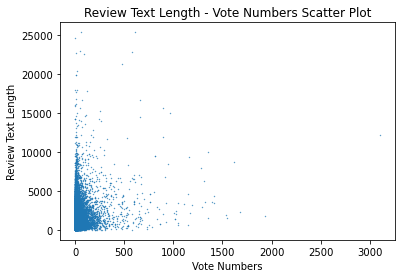

In [73]:
plt.scatter(vote_label1, text_length, marker = '.', s = 0.5)
plt.xlabel('Vote Numbers')
plt.ylabel('Review Text Length')
plt.title('Review Text Length - Vote Numbers Scatter Plot')
plt.show()